# This code assesses the outputs of VESIcal compared to the VolatileCalc parameterization of the Dixon (1997) model.  
- Test 1 compares saturation pressures from VolatileCalc and a Excel Macro with those from VESIcal for a variety of natural compositions, and synthetic arrays. 
- Test 2 compares isobars with those of VolatileCalc

In [ ]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally

In [36]:
myfile = v.ExcelFile('Testing_Dixon_1997(VolatileCalc).xlsx',  sheet_name=0, input_type='wtpercent')
data = myfile.data
VolatileCalc_PSat=data['VolatileCalc_P'] # Saturation pressure from VolatileCalc
DixonMacro_PSat=data['DixonMacro_P'] # Saturation pressure from dixon
satPs_wtemps_Dixon= myfile.calculate_saturation_pressure(temperature="Temp", model='Dixon')


/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3553: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


# Test 1 - Comparing saturation pressures from VESIcal to VolatileCalc and the Dixon macro

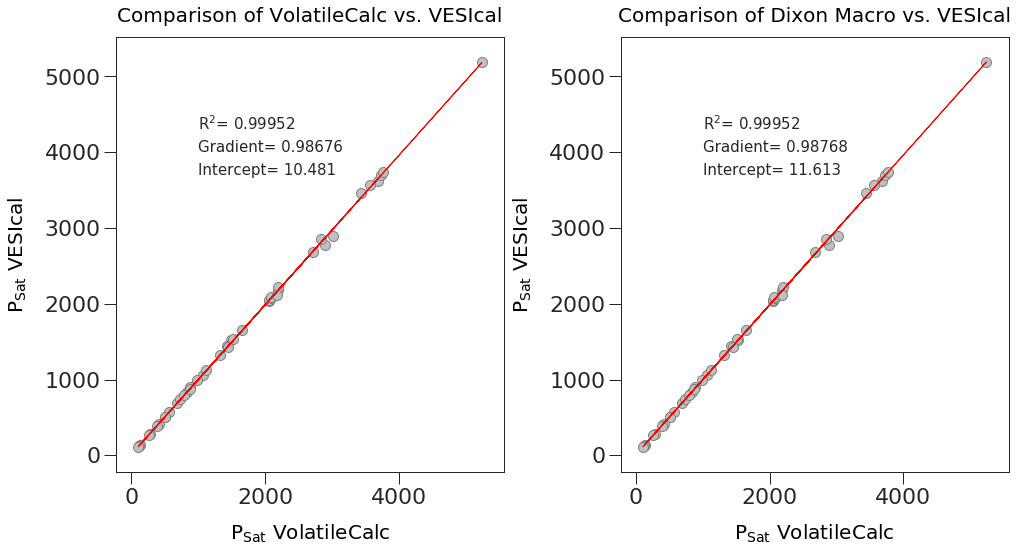

In [37]:
# Making linear regression
# VolatileCalc
X=VolatileCalc_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of VolatileCalc vs. VESIcal',
        fontdict= font, pad = 15)
ax1.set_xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
ax1.set_ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
ax1.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax1.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
ax1.text(1000, 3700, I, fontsize=15)
ax1.text(1000, 4000, G, fontsize=15)
ax1.text(1000, 4300, R, fontsize=15)


#Dixon Macro
X=DixonMacro_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures

ax2.set_title('Comparison of Dixon Macro vs. VESIcal',
        fontdict= font, pad = 15)
ax2.set_xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
ax2.set_ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
ax2.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax2.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')


#plt.plot([0, 4000], [0, 4000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
ax2.text(1000, 3700, I, fontsize=15)
ax2.text(1000, 4000, G, fontsize=15)
ax2.text(1000, 4300, R, fontsize=15)


plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


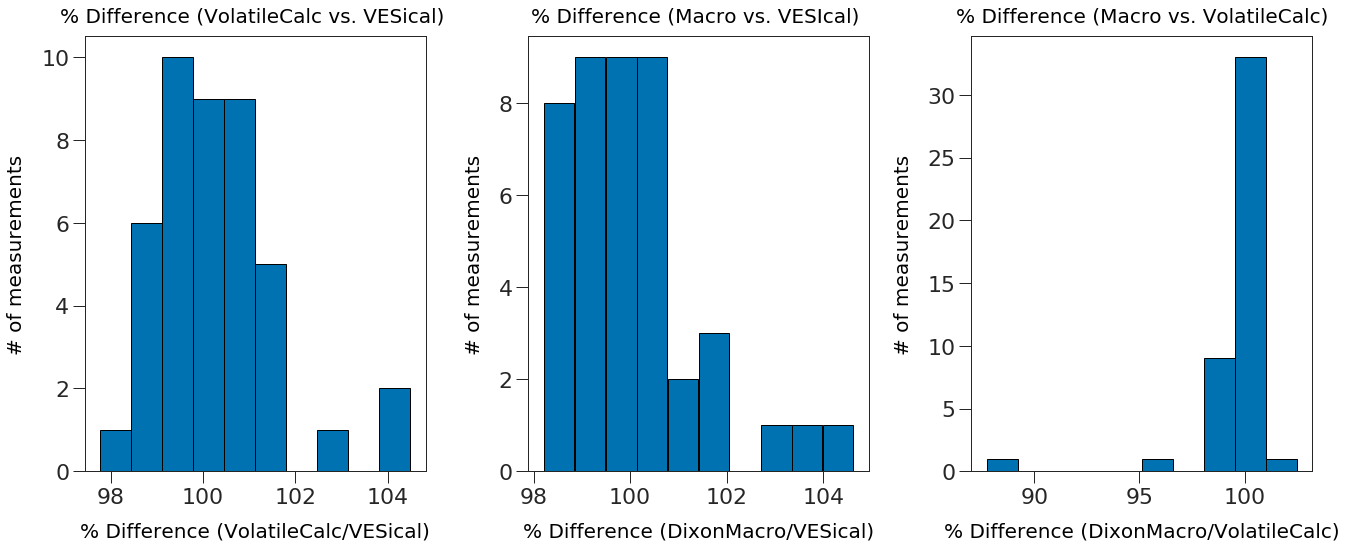

In [38]:
# This shows the % difference between VolatileCalc and VESIcal. The differences are similar to those between VolatileCalc and the Dixon Macro
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (22,8))
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('% Difference (VolatileCalc vs. VESical) ',
        fontdict= font, pad = 15)
ax1.set_xlabel('% Difference (VolatileCalc/VESical)', fontdict=font, labelpad = 15)
ax1.set_ylabel('# of measurements', fontdict=font, labelpad = 15)
ax1.hist(100*VolatileCalc_PSat/satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])

ax2.set_title('% Difference (Macro vs. VESIcal) ',
        fontdict= font, pad = 15)
ax2.set_xlabel('% Difference (DixonMacro/VESical)', fontdict=font, labelpad = 15)
ax2.set_ylabel('# of measurements', fontdict=font, labelpad = 15)
ax2.hist(100*DixonMacro_PSat/satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])

ax3.set_title('% Difference (Macro vs. VolatileCalc)',
        fontdict= font, pad = 15)
ax3.set_xlabel('% Difference (DixonMacro/VolatileCalc)', fontdict=font, labelpad = 15)
ax3.set_ylabel('# of measurements', fontdict=font, labelpad = 15)
ax3.hist(100*DixonMacro_PSat/VolatileCalc_PSat)

plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

# Test 2 - Comparing fluid composition to VolatileCalc and Macro

In [64]:
eqfluid_Dixon_VolatileCalcP = myfile.calculate_equilibrium_fluid_comp(temperature="Temp", pressure="VolatileCalc_P")
eqfluid_Dixon_DixonMacroP = myfile.calculate_equilibrium_fluid_comp(temperature="Temp", pressure="DixonMacro_P")
eqfluid_Dixon_DixonMacroP

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,VolatileCalc_P,VolatileCalc_H2Ov mol% (norm),VolatileCalc_CO2vmol% (norm),DixonMacro_P,DixonMacro_XH2O,DixonMacro_XCO2,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
1,50.502901,1.130391,15.868951,0.929916,0,7.530168,0.000,8.055971,0,0,...,3687.500000,0.558484,99.442358,3682.0,0.004751,0.995312,0.000000e+00,0.000000,MagmaSat,
2,49.779960,1.194805,14.819144,1.022711,0,8.281598,0.000,9.424541,0,0,...,3572.656250,0.417772,99.587986,3566.5,0.003490,0.996546,0.000000e+00,0.000000,MagmaSat,
3,50.099443,1.158780,15.432440,0.958232,0,7.759462,0.000,8.897299,0,0,...,3734.375000,0.410999,99.598511,3728.5,0.003413,0.996740,0.000000e+00,0.000000,MagmaSat,
4,47.855852,0.894812,17.842549,0.883467,0,7.154040,0.000,10.705108,0,0,...,136.171875,2.026222,97.969581,136.0,0.013679,0.988764,3.366886e-02,0.966331,MagmaSat,
5,46.965174,1.087048,16.226818,1.306586,0,10.580330,0.000,10.042098,0,0,...,401.171875,1.106493,98.889705,399.0,0.007866,0.993122,2.051803e-02,0.979482,MagmaSat,
6,52.540928,1.223901,16.655450,0.781091,0,6.414321,0.000,6.684503,0,0,...,2891.796875,1.191286,98.809347,2883.5,0.010682,0.989443,0.000000e+00,0.000000,MagmaSat,
7,48.818960,2.330000,12.360000,1.898331,0,9.681500,0.185,10.160000,0,0,...,691.796875,6.574265,93.432891,689.5,0.066536,0.933913,0.000000e+00,0.000000,MagmaSat,
8,48.882874,2.400000,12.170000,1.914998,0,9.766500,0.166,10.080000,0,0,...,835.058594,5.505042,94.494192,833.5,0.055702,0.944707,0.000000e+00,0.000000,MagmaSat,
9,48.743757,2.540000,12.500000,2.084998,0,10.633500,0.164,8.740000,0,0,...,40.126953,100.002131,0.000000,40.0,1.003186,0.000000,NaN,NaN,MagmaSat,Calculation Failed.


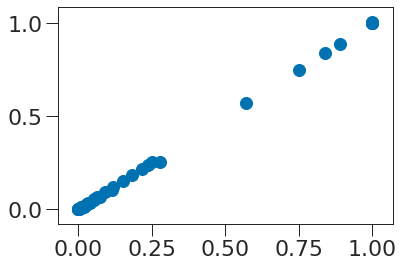

In [65]:
#VolatileCalc vs. DixonMacro are near identical
plt.scatter(0.01*eqfluid_Dixon_VolatileCalcP['VolatileCalc_H2Ov mol% (norm)'], eqfluid_Dixon_DixonMacroP['DixonMacro_XH2O'])  # VolatileCalc outputs in %)

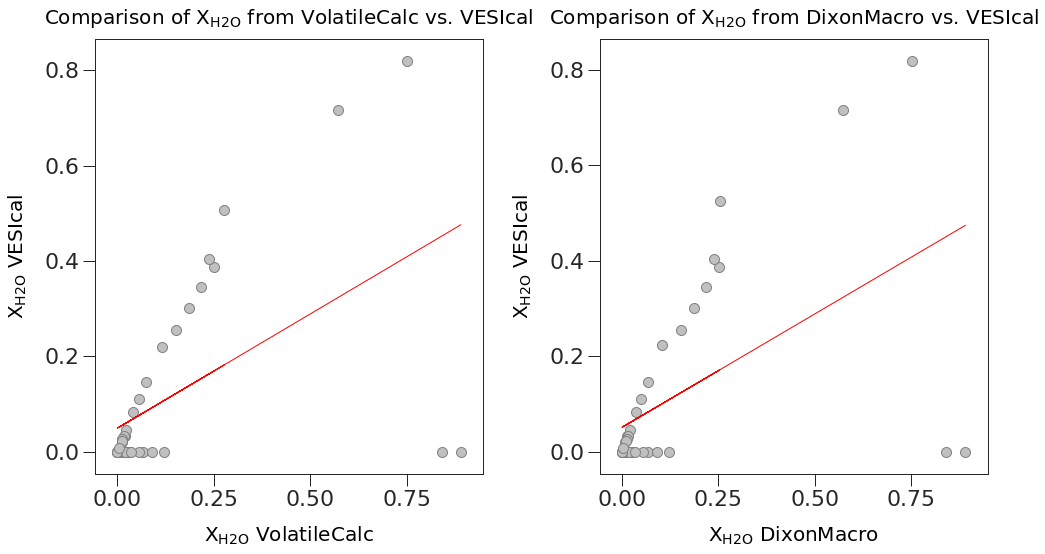

In [66]:
# Calculating mole fractions of H2O and CO2 in the fluid using the saturation pressures from VolatileCalc

# Making linear regression
# VolatileCalc
X=0.01*eqfluid_Dixon_VolatileCalcP['VolatileCalc_H2Ov mol% (norm)'] # VolatileCalc outputs in %
Y=eqfluid_Dixon_VolatileCalcP['XH2O_fl_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of X$_{H2O}$ from VolatileCalc vs. VESIcal',
        fontdict= font, pad = 15)
ax1.set_xlabel('X$_{H2O}$ VolatileCalc', fontdict=font, labelpad = 15)
ax1.set_ylabel('X$_{H2O}$ VESIcal', fontdict=font, labelpad = 15)
ax1.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax1.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
#ax1.text(0.1, 0.3, I, fontsize=15)
#ax1.text(0.1, 0.4, G, fontsize=15)
#ax1.text(0.1, 0.5, R, fontsize=15)
# Dixon Macro
X=eqfluid_Dixon_DixonMacroP['DixonMacro_XH2O']
Y=eqfluid_Dixon_DixonMacroP['XH2O_fl_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
ax2.set_title('Comparison of X$_{H2O}$ from DixonMacro vs. VESIcal',
        fontdict= font, pad = 15)
ax2.set_xlabel('X$_{H2O}$ DixonMacro', fontdict=font, labelpad = 15)
ax2.set_ylabel('X$_{H2O}$ VESIcal', fontdict=font, labelpad = 15)
ax2.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax2.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
#ax2.text(0.1, 0.3, I, fontsize=15)
#ax2.text(0.1, 0.4, G, fontsize=15)
#ax2.text(0.1, 0.5, R, fontsize=15)
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

# Comparing VESIcal with Dixon Macro

In [ ]:
X=DixonMacro_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)

In [ ]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of web app vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ DixonMAcro', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_pred, color='red', linewidth=1)
plt.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')
plt.plot([0, 4000], [0, 4000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
one='1:1 line'
plt.text(1000, 2700, I, fontsize=15)
plt.text(1000, 3000, G, fontsize=15)
plt.text(1000, 3300, R, fontsize=15)
plt.text(4000, 4000, one, fontsize=15)

# Comparison of Dixon Macro and VolatileCalc

In [ ]:
X=DixonMacro_PSat
Y=VolatileCalc_PSat
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)


In [ ]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of web app vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ DixonMAcro', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_pred, color='red', linewidth=1)
plt.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')
plt.plot([0, 4000], [0, 4000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
one='1:1 line'
plt.text(1000, 2700, I, fontsize=15)
plt.text(1000, 3000, G, fontsize=15)
plt.text(1000, 3300, R, fontsize=15)
plt.text(4000, 4000, one, fontsize=15)


In [ ]:
# Is it better if I use just dixon carbo
satPs_wtemps_DixonCarbon= myfile.calculate_saturation_pressure(temperature="Temp", model='DixonCarbon')
YShort=satPs_wtemps_DixonCarbon['SaturationP_bars_VESIcal'].iloc[22:26] # These are dry ones with same composition
XShort=VolatileCalc_PSat.iloc[22:26] # These are dry ones
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison ofJust Dixon Carbon vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)

plt.scatter(XShort, YShort,  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')


# Testing Isobars

In [ ]:
myfile_Isobar_input= v.ExcelFile('Testing_Dixon_1997(VolatileCalc).xlsx',   input_type='wtpercent', sheet_name='Isobar_Comp')
data_Isobar_input = myfile_Isobar_input.data
data_Isobar_input
SampleName=1
bulk_comp= myfile_Isobar_input.get_sample_oxide_comp(SampleName, norm='standard')
temperature=1200

# Calculating isobars
isobars, isopleths = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Dixon',
                                            temperature=temperature,
                                            pressure_list=[500, 1000, 2000, 3000],
                                            isopleth_list=[0, 0.1, 0.2, 0.3, 0.5, 0.8, 0.9, 1],
                                            print_status=True).result

In [ ]:
#Loading Isobars from VolatileCalc 
Isobar_output= pd.read_excel('Testing_Dixon_1997(VolatileCalc).xlsx', sheet_name='Isobar_Outputs', index_col=0)
Isobar_output

In [ ]:
isobars

In [ ]:
isobars.loc[isobars.Pressure==500, 'CO2_liq']

In [ ]:
dissolved_noH2O=v.calculate_dissolved_volatiles(sample=bulk_comp, temperature=1200.0, pressure=500.0,  model='Dixon',
                                X_fluid=0, verbose=True).result

In [ ]:


fig, ax1 = plt.subplots(figsize = (17/2,20/2))

plt.scatter(Isobar_output['Wt%H2O'], Isobar_output['PPMCO2'], marker='d', s=10)
plt.plot(isobars.loc[isobars.Pressure==500, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==500, 'CO2_liq'])
plt.plot(isobars.loc[isobars.Pressure==1000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==1000, 'CO2_liq'])
plt.plot(isobars.loc[isobars.Pressure==2000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==2000, 'CO2_liq'])
plt.plot(isobars.loc[isobars.Pressure==3000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==3000, 'CO2_liq'])